<a href="https://colab.research.google.com/github/SpaceXdaehan/Python/blob/main/py19_yob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋 준비

* YOB: Year Of Birth
* github: https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames
* 1880년 ~ 2010년까지 연도별로 텍스트(txt) 파일이 저장되어 있음.
* 각 파일에는 '이름, 성별, 신생아수'가 comma(,)로 구분되어 있음.
* (주의) 모든 파일에는 컬럼 이름은 파일에 없음.

In [ ]:
file_path = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/babynames/yob1880.txt'

yob1880 = pd.read_csv(file_path)

In [ ]:
yob1880.head()

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


`pd.read_csv()` 함수는 파일의 첫번째 줄을 데이터프레임의 컬럼 이름으로 취급함.

CSV 파일에서 컬럼 이름이 포함되어 있지 않은 경우 (파일을 첫번쨰 줄부터 데이터가 시작되는 경우)에는 컬럼 이름들을 함수 호출할 때 `names`파라미터에 아규먼트로 전달해야됨.

In [ ]:
col_names = ['name', 'gender', 'births'] # 데이터 프레임 컬럼 이름 리스트

In [ ]:
yob1880 = pd.read_csv(file_path, names=col_names)

In [ ]:
yob1880.head()

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


1880년 부터 2010년까지 각각의 txt 파일들을 읽어서 만들어진 연도별 데이터프레임들을 저장하는 리스트를 만들기. (결과=) 131개의 데이터프레임을 저장하는 리스트.

각각의 데이터프레임에는 year라는 컬럼을 추가.

In [ ]:
yobs = [] # 연도별 데이터프레임들을 저장하기 위한 리스트.
for year in range(1880, 2011):
  # txt 파일이 저장된 github 주소:
  file_path = f'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/babynames/yob{year}.txt'

  # github의 txt 파일을 읽어서 데이터프레임을 생성:
  df = pd.read_csv(file_path, names=col_names)

  # 데이터프레임 year 컬럼을 추가:
  df['year'] = year

  # 데이터프레임을 리스트에 추가:
  yobs.append(df)

데이터프레임 확인

In [ ]:
len(yobs) # 2010 - 1880 + 1 = 131

131

In [ ]:

# 리스트의 첫번째 데이터프레임 - 1880년 자료
yobs[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yobs[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [ ]:
# 리스트에서 가장 마지막 데이터프레임
yobs[-1].head()

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010


In [ ]:
yobs[-1].tail()

,name,gender,births,year
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010
33837,Zzyzx,M,5,2010


131개 데이터프레임들을 한개의 데이터프레임으로 합치는 작업.

In [ ]:
yob_df = pd.concat(yobs, ignore_index=True)
# ignore_index: 기본 값은 False이고 True인 경우에는,
# 각 데이터프레임들의 기존 인덱스를 무시하고 재색인(re-indexing)을 한다.

In [ ]:
yob_df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [ ]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [ ]:
# 연도별 신생아 수를 찾고 데이터를 시각화
births_by_year = yob_df.groupby('year').births.sum()
births_by_year

year
1880     201486
1881     192703
1882     221538
1883     216954
1884     243466
         ...   
2006    3946702
2007    3986130
2008    3915955
2009    3801002
2010    3657392
Name: births, Length: 131, dtype: int64

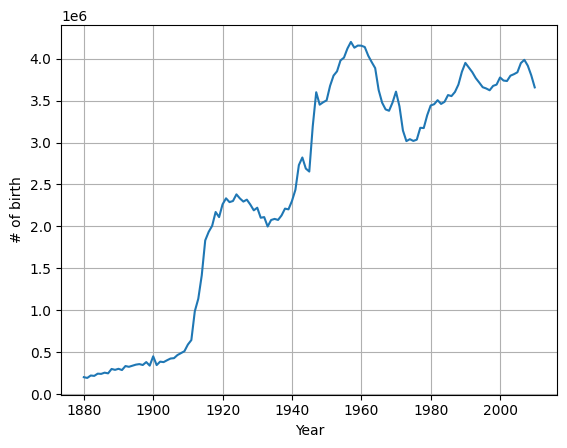

In [ ]:
plt.plot(births_by_year.index, births_by_year.values)

plt.grid()
plt.xlabel('Year')
plt.ylabel('# of birth')

plt.show()

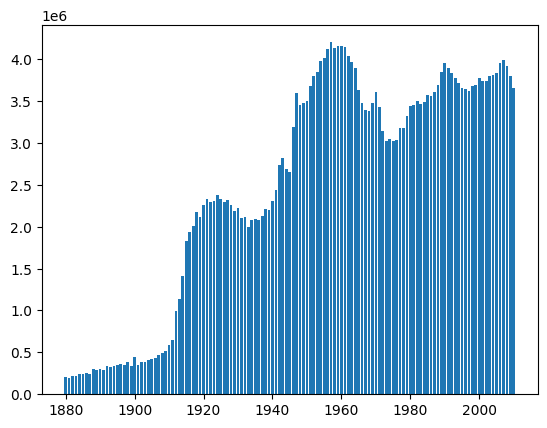

In [ ]:
plt.bar(x=births_by_year.index, height=births_by_year.values)
plt.show()

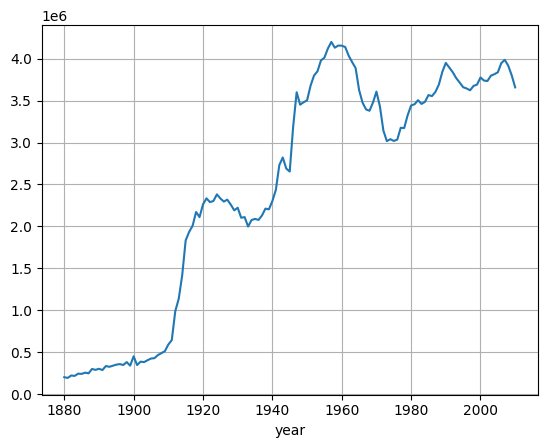

In [ ]:
sns.lineplot(x=births_by_year.index, y=births_by_year.values)

plt.grid()
plt.show()

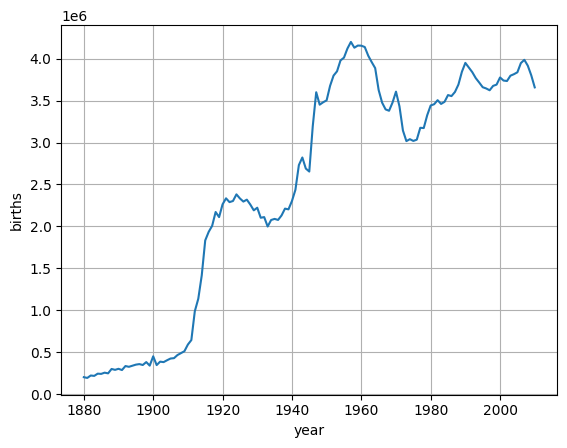

In [ ]:
sns.lineplot(data=yob_df, x='year', y='births', estimator=np.sum, errorbar=None)
plt.grid()
plt.show()

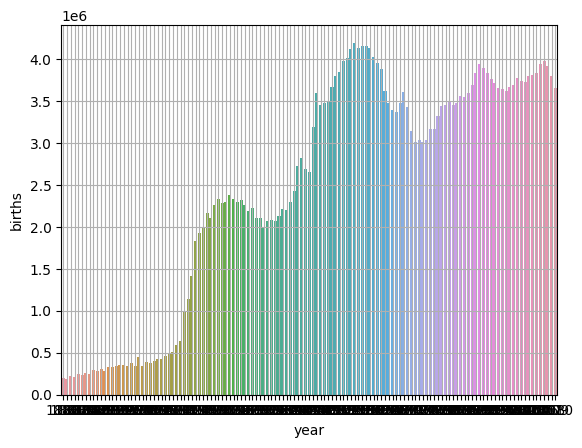

In [ ]:
sns.barplot(data=yob_df, x='year', y='births', estimator='sum', errorbar=None)
plt.grid()
plt.show()

연도별 성별 신생아수, 시각화

In [ ]:
births_by_year_gender = yob_df.groupby(['year', 'gender']).births.sum()
births_by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [ ]:
births_pivot = yob_df.pivot_table(values='births', index='year', columns='gender', aggfunc='sum')
births_pivot

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


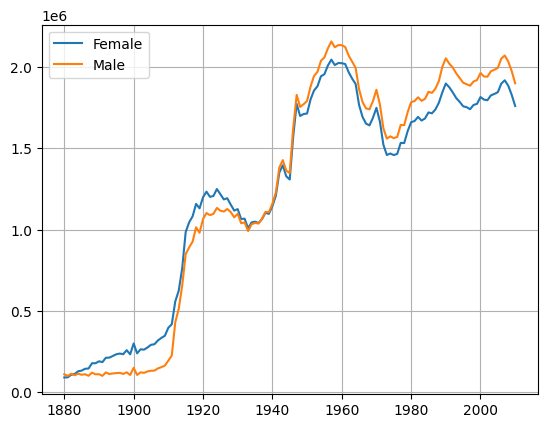

In [ ]:
plt.plot(births_pivot.index, births_pivot.F, label='Female')
plt.plot(births_pivot.index, births_pivot.M, label='Male')

plt.legend()
plt.grid()
plt.show()

In [ ]:
df = births_by_year_gender.reset_index()
# reset_index(): Series, DataFrame의 인덱스들을 DataFrame의 컬럼으로 변환
df

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [ ]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']

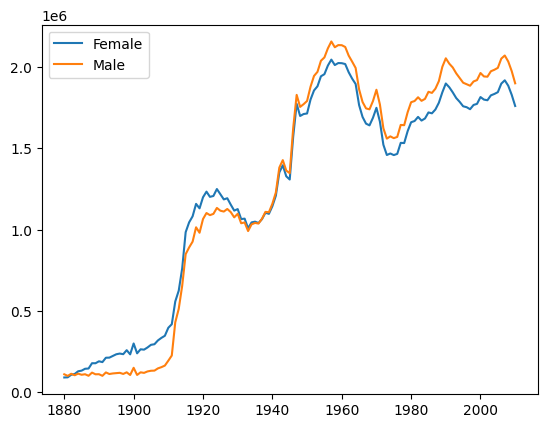

In [ ]:
plt.plot(df_female.year, df_female.births, label='Female')
plt.plot(df_male.year, df_male.births, label='Male')

plt.legend()
plt.show()

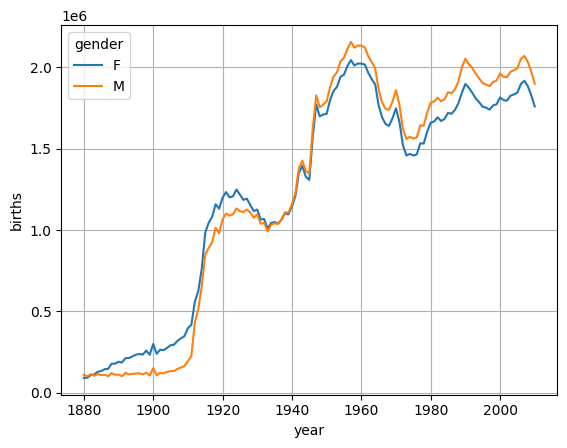

In [ ]:
sns.lineplot(data=yob_df, x='year', y='births', hue='gender', estimator='sum', errorbar=None)

plt.grid()
plt.show()